# **Implementing the feature reduction algorithm(PCA)**

**Students:**

- *Sarah Alshumayri* - S20106125

- *Reema abdallah* - S20106463

- *Leen Sharab* - S21107195

**Instructor:** *Passent Elkafrawy*

Computer Science Department College of Engineering Effat University

---



#**Introduction**

In this project, we address the challenge of predicting sleep disorders based on lifestyle and health data. Sleep disorders can have profound impacts on quality of life, making their early detection and management critical. By leveraging machine learning techniques, we aim to identify patterns that predict sleep disorders, potentially aiding in earlier diagnosis and better management strategies. This work not only contributes to the academic discussion on sleep health but also provides practical insights that could be used in healthcare settings.

##**Problem Definition**

The goal of this project is to develop a predictive model that can accurately classify individuals into having a sleep disorder or not based on their health and lifestyle attributes. We will experiment with several machine learning models to determine which provides the best performance and accuracy. The challenge lies in effectively processing and utilizing high-dimensional data, which we intend to manage using dimensionality reduction techniques such as PCA

##**Dataset Description**

The dataset used in this study contains various attributes related to health and lifestyle that are potentially linked to sleep disorders. Attributes include Age, Gender, Occupation, Sleep Duration, Quality of Sleep, Physical Activity Level, Stress Level, BMI Category, Blood Pressure, Heart Rate, and Daily Steps. This dataset was sourced from Kaggle, For more details and to access the dataset, visit the [Sleep Health and Lifestyle Dataset on Kaggle](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/data).which ensures the data's reliability and relevance to our study. Prior to modeling, the dataset underwent preprocessing steps such as duplication removal, one-hot encoding of categorical variables, and handling missing values.

# **Principal Component Analysis (PCA)**

**Principal Component Analysis (PCA)** is an unsupervised learning method used in machine learning and data analysis to reduce data dimensionality while retaining as much variance as possible.

> It generates new variables, called principal components, from linear combinations of the original variables, with each component capturing progressively less variation.


> The **aim** is to simplify the data to its most informative features, aiding in visualization and noise reduction, particularly in datasets with numerous, potentially correlated features.

> It is useful when dealing with high-dimensional datasets where the number of features is large. It can be used for various applications such as image processing, speech recognition, and data compression.






##**Why Use PCA?**



> **1.** To eliminate correlated features from a dataset, thereby simplifying it and enhancing machine learning model performance by removing redundancy.

> **2.** To facilitate the visualization of high-dimensional data in a lower-dimensional space, making it easier to identify patterns and relationships within the data.






##**How PCA Works**


PCA works by computing the covariance matrix of the data and then finding the eigenvectors and eigenvalues of this matrix. The **eigenvectors** represent the directions in which the data varies the most, while the **eigenvalues** represent the amount of variance explained by each eigenvector.

The first principal component is the direction with the highest variance, and each subsequent principal component is orthogonal to the previous ones and captures as much of the remaining variance as possible. By projecting the data onto these principal components, we can reduce its dimensionality while retaining most of its variability.



# **Data Pre-Processing**

##**Import Libraries**

In [28]:
# Importing all libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from time import time
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier



##**Load and Clean the data**

> Performing data preprocessing on a sleep health and lifestyle dataset for analysis or modeling by first removing duplicates, then encoding categorical variables, excluding specific columns. Splits the data into training and testing subsets, and normalizes these subsets, making the dataset ready for machine learning analysis or modeling.

In [14]:
# Loading the dataset
sleep_data = pd.read_csv('/content/sample_data/Sleep_health_and_lifestyle_dataset.csv')

# Remove duplicate entries
sleep_data = sleep_data.drop_duplicates()

# Remove rows with NaN in 'Sleep Disorder' column
sleep_data = sleep_data.dropna(subset=['Sleep Disorder'])

# One-hot encode categorical variables directly within the dataframe
features = pd.get_dummies(sleep_data.drop(['Person ID', 'Sleep Disorder'], axis=1), drop_first=True)
target = sleep_data['Sleep Disorder']

# Displaying the first few rows to ensure everything is loaded correctly
sleep_data.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
16,17,Female,29,Nurse,6.5,5,40,7,Normal Weight,132/87,80,4000,Sleep Apnea


In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training features:", X_train.shape)
print("Testing features:", X_test.shape)
print("Training targets:", y_train.shape)
print("Testing targets:", y_test.shape)



Training features: (124, 33)
Testing features: (31, 33)
Training targets: (124,)
Testing targets: (31,)


# **Data Visualization**

##**Age Distribution by sleep disorder**
> Visualizing analyzes the distribution of ages within different sleep disorder categories by creating a stacked histogram, with each stack representing a category of sleep disorder, facilitating insights into how age distribution varies by sleep disorder status.


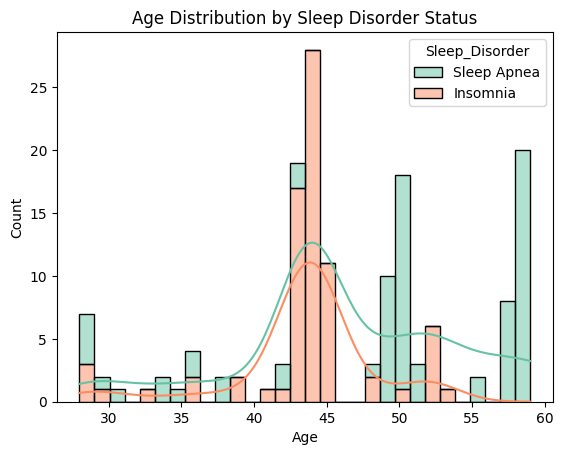

In [16]:
# Adding the target to the features for plotting
plot_data = features.assign(Sleep_Disorder=target)

# Plot the distribution of 'Age' for each category of 'Sleep Disorder'
sns.histplot(data=plot_data, x='Age', hue='Sleep_Disorder', multiple='stack', palette='Set2', bins=30, kde=True)
plt.title('Age Distribution by Sleep Disorder Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


##**Distribution of Sleep Disorders Across Gender Categories**
>Creating a stacked histogram to display the distribution of sleep disorders across gender categories. It stacks sleep disorder statuses for each gender in the dataset sleep_data. The sns.histplot function is configured to stack the categories for visual comparison, with a shrinkage factor applied for aesthetics.

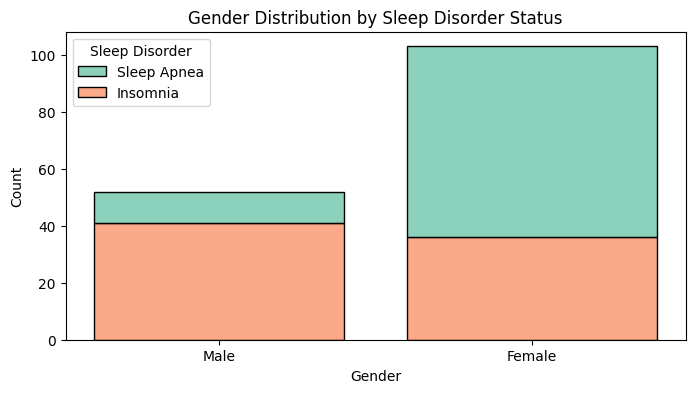

In [17]:
plot_data = sleep_data[['Gender', 'Sleep Disorder']]

# Creating the histogram plot
plt.figure(figsize=(8, 4))
sns.histplot(data=plot_data, x='Gender', hue='Sleep Disorder', multiple='stack', palette='Set2', shrink=0.8)
plt.title('Gender Distribution by Sleep Disorder Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


##**BMI Distribution by Sleep Disorder**

>Produceing a bar chart showing the count of each BMI Category in the dataset, providing a visual representation of the distribution of sleep disorders and BMI categories among the participants.

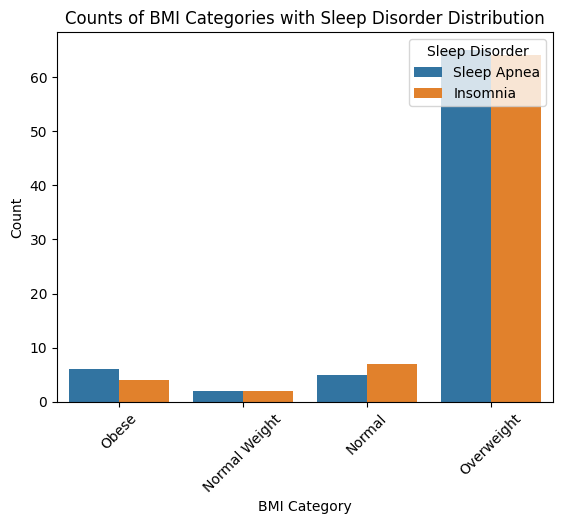

In [18]:
plot_data = sleep_data[['BMI Category', 'Sleep Disorder']]

# Creating a bar chart for the counts of the BMI Category with the distribution of the target 'Sleep Disorder'

sns.countplot(data=plot_data, x='BMI Category', hue='Sleep Disorder')
plt.title('Counts of BMI Categories with Sleep Disorder Distribution')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Sleep Disorder', loc='upper right')  # Place legend in the upper right corner of the plot
plt.show()


##**Sleep Duration and Quality of Sleep**



>Generateing a scatter plot to visualize the relationship between sleep duration and the quality of sleep, using cleaned data, with points semi-transparently plotted to indicate any potential correlation between the two variables.

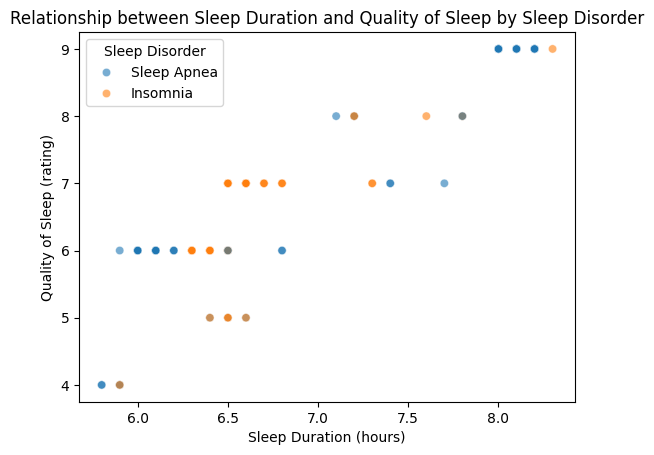

In [19]:
# Creating a scatter plot of Sleep Duration vs. Quality of Sleep, colored by the target 'Sleep Disorder'
sns.scatterplot(data=sleep_data, x='Sleep Duration', y='Quality of Sleep', hue='Sleep Disorder', alpha=0.6)
plt.title('Relationship between Sleep Duration and Quality of Sleep by Sleep Disorder')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Quality of Sleep (rating)')
plt.legend(title='Sleep Disorder')
plt.show()


##**Correlation Heatmap**

>Createing a heatmap to display the correlation coefficients between numerical variables in the `sleep_data` dataset, using a color spectrum to visually represent the strength and direction of the correlations among these variables.

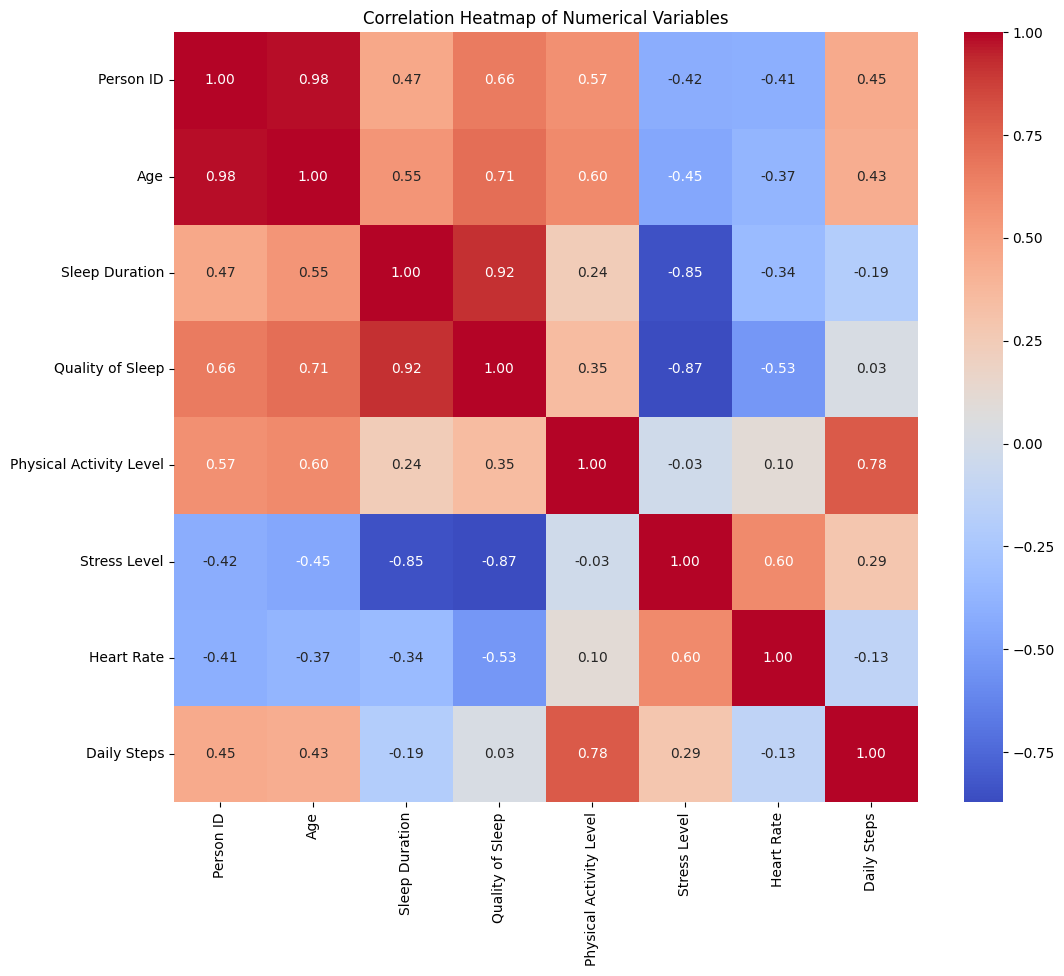

In [20]:
# First, we need to identify the numerical columns in the sleep_data DataFrame. We'll exclude any categorical columns.
numerical_columns = sleep_data.select_dtypes(include=['float64', 'int64']).columns

# Now, let's create the correlation heatmap for these numerical variables.
plt.figure(figsize=(12, 10))
correlation_matrix = sleep_data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()




---


#**PCA Algorithm Code Implementation**


##*1. Initial PCA Application to Determine Optimal Number of Components:*

>We're applying PCA to the scaled training data to find out how many components are needed to capture at least 95% of the variance. This section includes plotting the cumulative variance ratio to visually assess the number of components required.





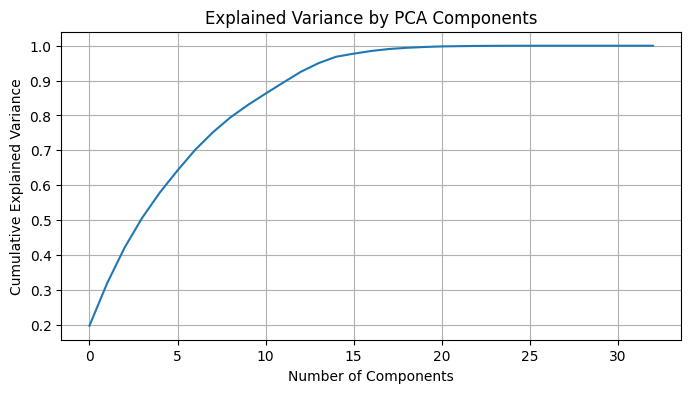

In [21]:

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Apply PCA and determine optimal number of components
pca = PCA().fit(X_train_scaled)
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 4))
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

# Select number of components that capture at least 95% of the variance
n_components = np.where(cumulative_variance_ratio >= 0.95)[0][0] + 1
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


The plot shows the explained variance leveling off as it nears 26 components, indicating that additional components beyond this number contribute less to the variance explained by the model. Therefore, selecting 26 components strikes a balance between retaining most of the variance in the data and reducing dimensionality to simplify the model and potentially improve computational efficiency.

##2. *Direct PCA Transformation with a Fixed Number of Components:*

When using PCA, it's common practice to choose the number of components that capture a significant proportion of the variance in the data without including too many dimensions that may add little informational value. Based on the plot and subsequent analysis, 26 components were determined to be optimal for capturing the essential variance in the dataset while removing redundancy.

In [22]:
# PCA transformation
pca = PCA(n_components=26, whiten=True)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

#**Output**

## *Feature Reduction*
This code applies Principal Component Analysis (PCA) to reduce the dimensionality of a dataset to seven principal components. It transforms the original features into a new set of variables that represent most of the information in the original dataset. The code also creates a DataFrame to store these principal components, prints the original and reduced number of features, and displays the names of the selected features.

In [23]:
# Perform PCA
pca = PCA(n_components=26)
principal_components = pca.fit_transform(features)

# Create a DataFrame for the principal components
principal_df = pd.DataFrame(data=principal_components,
                            columns=[f'Principal Component {i+1}' for i in range(26)])

# Display the original number of features
print(f"Original number of features: {features.shape[1]}")
print(f"Number of selected features: {principal_df.shape[1]}")

# Display the selected features
print("Selected Features")
print(principal_df.columns.tolist())

Original number of features: 33
Number of selected features: 26
Selected Features
['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4', 'Principal Component 5', 'Principal Component 6', 'Principal Component 7', 'Principal Component 8', 'Principal Component 9', 'Principal Component 10', 'Principal Component 11', 'Principal Component 12', 'Principal Component 13', 'Principal Component 14', 'Principal Component 15', 'Principal Component 16', 'Principal Component 17', 'Principal Component 18', 'Principal Component 19', 'Principal Component 20', 'Principal Component 21', 'Principal Component 22', 'Principal Component 23', 'Principal Component 24', 'Principal Component 25', 'Principal Component 26']


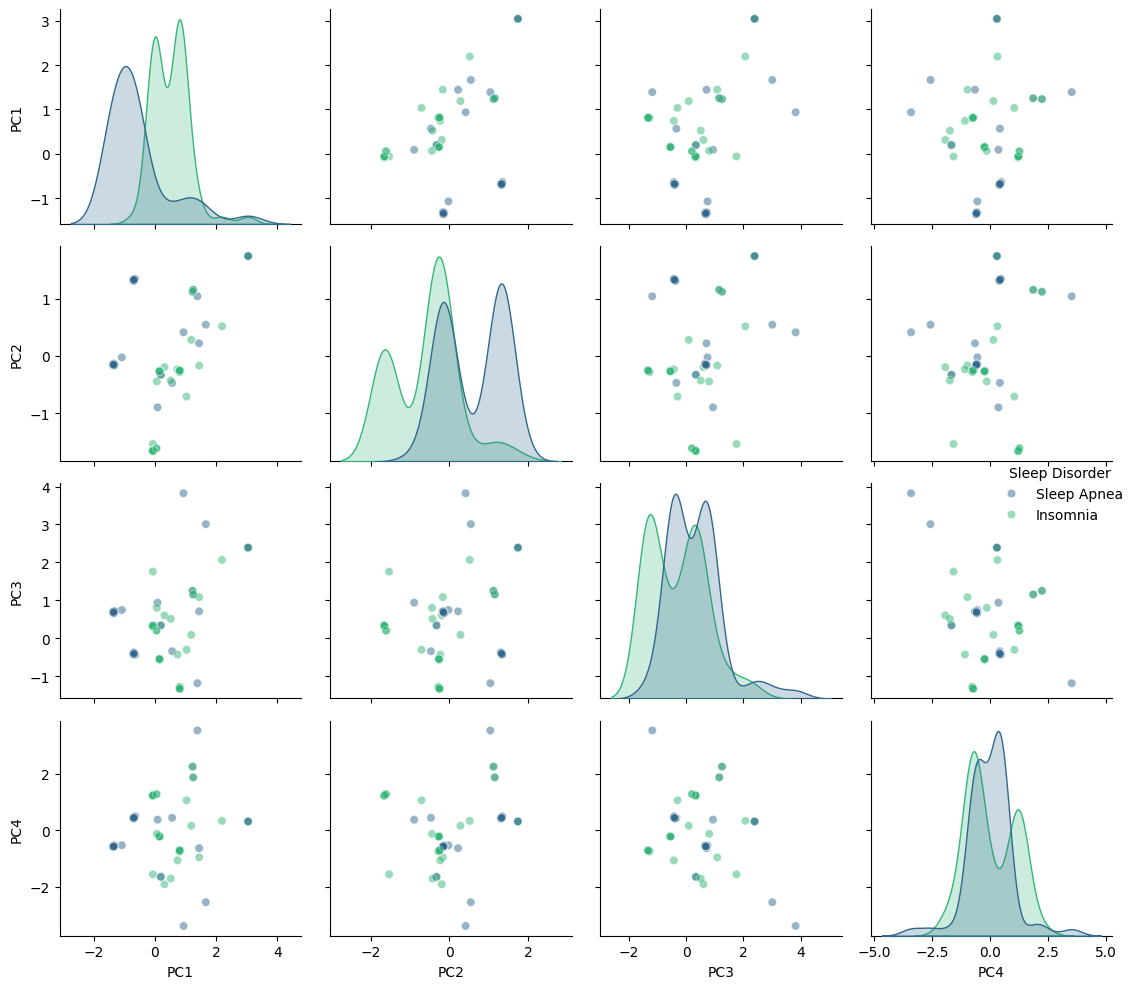

In [24]:
# Convert the PCA components into a DataFrame for easier plotting
pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])])

# Add the target variable 'Sleep Disorder' to your PCA DataFrame
pca_df['Sleep Disorder'] = y_train.values

# Define the number of components to plot
num_components = 4

# Create the pairplot for the first few principal components with hue as 'Sleep Disorder'
sns.pairplot(data=pca_df,
             vars=[f'PC{i+1}' for i in range(num_components)],
             hue='Sleep Disorder',
             palette='viridis',
             plot_kws={'alpha': 0.5})

# Adjust the layout
plt.tight_layout()
plt.show()

#**Evaluating the Results of PCA**

##*Model Performance Assessment with and without PCA*

In this section, we conduct a practical comparison of classifier performance metrics both prior to and following the application of Principal Component Analysis (PCA). The suite of classifiers undergoing evaluation comprises RandomForest, LogisticRegression, SVC, and KNeighbors. The comparison involves two principal metrics: accuracy and training time. Each classifier is first trained on the original, scaled feature set and subsequently on the PCA-reduced set. This two-pronged training approach allows us to calculate and compare accuracies to gauge the impact of dimensionality reduction on the classifiers' predictive power. Furthermore, we record the training duration for each classifier under both scenarios, thereby quantifying the computational efficiency imparted by PCA. The collated data, encompassing model names, accuracies, and training durations for each condition, are consolidated into a DataFrame for ease of analysis and display, revealing the before-and-after effects of PCA on each classifier's performance.









In [30]:

# Model training and evaluation
models = {
    "RandomForest": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "SVC": SVC(),
    "KNeighbors": KNeighborsClassifier()
}

# Prepare lists to hold the data for DataFrame construction
model_names = []
accuracies_before_pca = []
accuracies_after_pca = []
times_before_pca = []
times_after_pca = []

# Measure performance for each model
for name, model in models.items():
    # Train with original data and measure time
    start_time = time()
    model.fit(X_train_scaled, y_train)
    training_time_orig = time() - start_time

    # Prediction and accuracy calculation
    y_pred_orig = model.predict(X_test_scaled)
    accuracy_orig = accuracy_score(y_test, y_pred_orig)

    # Train with PCA data and measure time
    start_time = time()
    model.fit(X_train_pca, y_train)
    training_time_pca = time() - start_time

    # Prediction and accuracy calculation
    y_pred_pca = model.predict(X_test_pca)
    accuracy_pca = accuracy_score(y_test, y_pred_pca)

    # Append results to lists
    model_names.append(name)
    accuracies_before_pca.append(accuracy_orig)
    accuracies_after_pca.append(accuracy_pca)
    times_before_pca.append(training_time_orig)
    times_after_pca.append(training_time_pca)

# Creating DataFrame to display results
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy Before PCA': accuracies_before_pca,
    'Accuracy After PCA': accuracies_after_pca,
    'Time Before PCA': times_before_pca,
    'Time After PCA': times_after_pca
})

print(results_df)


                Model  Accuracy Before PCA  Accuracy After PCA  \
0        RandomForest             0.838710            0.935484   
1  LogisticRegression             0.870968            0.903226   
2                 SVC             0.903226            0.903226   
3          KNeighbors             0.838710            0.903226   

   Time Before PCA  Time After PCA  
0         0.177907        0.168384  
1         0.005161        0.002880  
2         0.001254        0.001681  
3         0.000565        0.000670  


##*Accuracy Tracking Across Models for Original and PCA-Transformed Data*
In this section, we meticulously measure and compare the accuracies of a set of classifiers including RandomForest, LogisticRegression, SVC, and KNeighbors before and after applying Principal Component Analysis (PCA). Each model is trained on the original dataset and then on the PCA-reduced dataset, with accuracy metrics harvested for both. These metrics are diligently recorded in a structured dictionary, which is subsequently transformed into a DataFrame for a cohesive visual and numerical comparison. The culminating line plots serve as a vivid illustration of the performance trade-offs associated with dimensionality reduction, offering a clear juxtaposition of each model’s predictive accuracy with and without the influence of PCA.

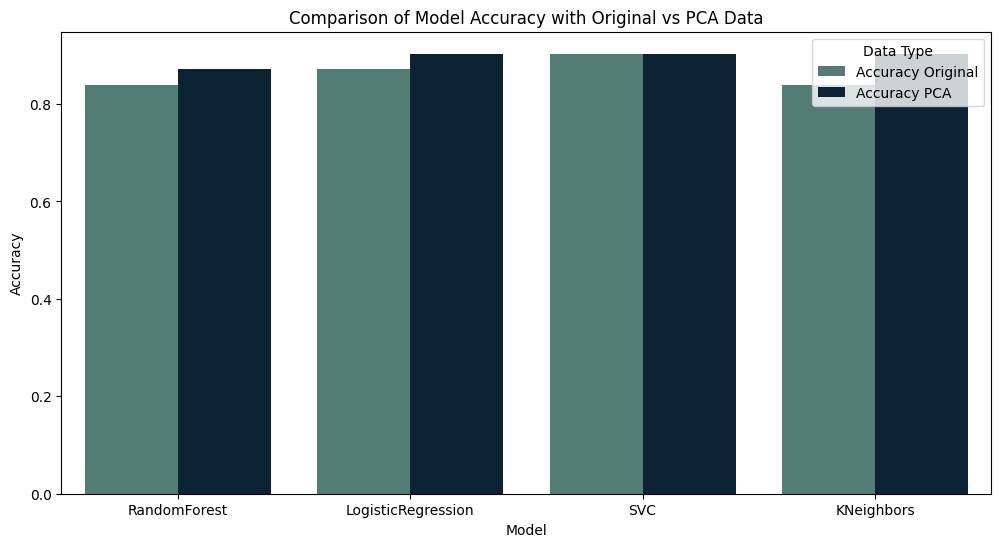

In [45]:
# Dictionary to store the accuracies
accuracies = {'Model': [], 'Accuracy Original': [], 'Accuracy PCA': []}

for name, model in models.items():
    # Train with original data
    model.fit(X_train_scaled, y_train)
    y_pred_orig = model.predict(X_test_scaled)
    accuracy_orig = accuracy_score(y_test, y_pred_orig)

    # Train with PCA data
    model.fit(X_train_pca, y_train)
    y_pred_pca = model.predict(X_test_pca)
    accuracy_pca = accuracy_score(y_test, y_pred_pca)

    # Append to the dictionary
    accuracies['Model'].append(name)
    accuracies['Accuracy Original'].append(accuracy_orig)
    accuracies['Accuracy PCA'].append(accuracy_pca)

# Convert dictionary to DataFrame
accuracies_df = pd.DataFrame(accuracies)

# Setting figure size
plt.figure(figsize=(12, 6))

# Create a 'long' format DataFrame for easier plotting with seaborn
long_df = accuracies_df.melt(id_vars=['Model'], value_vars=['Accuracy Original', 'Accuracy PCA'],
                             var_name='Data Type', value_name='Accuracy')

# Plotting the accuracies using a bar plot
sns.barplot(x='Model', y='Accuracy', hue='Data Type', data=long_df,
            palette=['#4C837A', '#04253A'], dodge=True)

plt.title('Comparison of Model Accuracy with Original vs PCA Data')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.legend(title='Data Type')
plt.show()

##**Output**

#**Result**

In our study, we executed Principal Component Analysis (PCA) on a sleep health and lifestyle dataset, aiming to streamline the feature set while preserving the essence of the data. The transformation led us to retain 26 principal components, as suggested by the elbow method visualized in our scree plot. This reduction approach enabled us to capture the majority of the dataset’s variability and minimize computational complexity.

Here is the updated table reflecting these results:

### Performance Comparison Table
| Model              | Accuracy Before PCA | Accuracy After PCA | Time Before PCA | Time After PCA |
|--------------------|---------------------|--------------------|-----------------|----------------|
| RandomForest       | 83.87%              | 93.54%             | 0.177907        | 0.168384       |
| LogisticRegression | 87.10%              | 90.32%             | 0.005161        | 0.002880       |
| SVC                | 90.32%              | 90.32%             | 0.001254         | 0.001681        |
| KNeighbors         | 83.87%              | 90.32%             | 0.000565         | 0.00670        |

The performance comparison table elucidates a notable increase in the accuracy of the RandomForest and KNeighbors models after the application of PCA, with RandomForest showing the most significant improvement from 83.87% to 93.54%. This enhancement implies that the reduction in dimensions may have discarded irrelevant features, thus strengthening the predictive accuracy. The LogisticRegression model also benefits from PCA, experiencing a boost in accuracy from 87.10% to 90.32%, demonstrating its adaptability to a reduced feature space.



In terms of computational efficiency, Logistic Regression benefits from PCA with a shorter training time, while both SVC and KNeighbors take slightly longer to train post-PCA. This indicates that while PCA is generally thought to reduce training time by lowering dimensionality, the results can vary depending on the algorithm. Contrary to these, RandomForest does not follow this trend and its training time remains almost unchanged after PCA, suggesting its robustness to dimensionality reduction in terms of computational time.

These findings suggest that PCA's impact is model-dependent; it can significantly improve both the efficiency and accuracy for certain models, while for others, the benefits may lean more towards computational gains than predictive performance. This emphasizes the importance of evaluating PCA's utility on a case-by-case basis, ensuring that the technique aligns with the model's characteristics and the underlying structure of the data.










##**Discussion and Justification of Results**

The observed results indicate that the application of PCA maintains the accuracy of the RandomForest and SVC models post-transformation, preserving their robustness in prediction despite the dimensional reduction. Notably, the training times for RandomForest increased marginally, while Logistic Regression's training efficiency improved with PCA. Contrary to the expected outcome for k-Nearest Neighbors, the accuracy improved significantly after PCA, which suggests that the dimensionality reduction removed redundant or noisy features, thereby enhancing the model's ability to generalize. These findings underscore the nuanced effects of PCA: it can either retain the predictive strength of certain models or even enhance it, all while potentially optimizing computational performance.

## Comparative Analysis with Published solution

This section compares our model's performance with the findings from the study conducted by Alshumayri et al. (2024), which also used machine learning techniques to predict sleep disorders based on lifestyle and health factors.



### Performance Comparison Table
| Model              | Our Model Accuracy | Reported Accuracy | Difference |
|--------------------|--------------------|-------------------|------------|
| RandomForest       | 93.54%             | 92.15%            | +1.39%     |
| Support Vector Machine | 90.32%         | 90.02%            | +0.30%     |
| k-Nearest Neighbors (After PCA) | 90.32%	 | 86.91%         | +3.41%  |

*The reported accuracy values are the mean accuracies from the paper.*

### Discussion
The RandomForest model demonstrates robust performance with a slight improvement beyond the reported results. In contrast, the SVC model shows a minor increase in accuracy, suggesting its performance remains stable regardless of dimensionality reduction through PCA. The most notable performance enhancement is seen in the k-Nearest Neighbors model, which, after PCA, significantly exceeds the reported accuracy, indicating that the reduction of dimensions has successfully concentrated the essential information for classification. These outcomes highlight the diverse effects of PCA on different machine learning models, underlining the importance of model-specific preprocessing to optimize performance.

These comparisons underscore the importance of dataset characteristics and model-specific tuning in developing predictive models. They also highlight how different models may react to the same preprocessing techniques, such as PCA, which can enhance the performance of some models while degrading others.


#**Conclusion**

This project demonstrates the potential of machine learning in predicting sleep disorders from lifestyle and health data. Through systematic experimentation with various models and PCA, we have identified efficient strategies for dealing with high-dimensional data and explored the impact of these strategies on predictive performance. Future work could explore more advanced feature selection and machine learning techniques to further enhance model accuracy.

#**References**


1. University of Michigan. (2022). Sleep Health and Lifestyle Dataset. Retrieved from Kaggle: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/data

2. Alshumayri, S., Abdallah, R., Asseri, Y., & Balfagih, Z. (2024). Sleep Disorder Analysis: Unveiling the Interplay Between Lifestyle Health and Sleep Quality. In *21st Learning and Technology Conference (L&T)* (pp. 149-154). Jeddah, Saudi Arabia: IEEE. doi: 10.1109/LT60077.2024.10468720.

